In [1]:
!pip install fastai

In [2]:
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
path = untar_data(URLs.CIFAR)

In [4]:
data = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                    get_items=get_image_files,
                    get_y=parent_label,
                    item_tfms=Resize(224))

In [5]:
dataloader = data.dataloaders(path, bs=64, valid_pct=0.2, seed=42,)

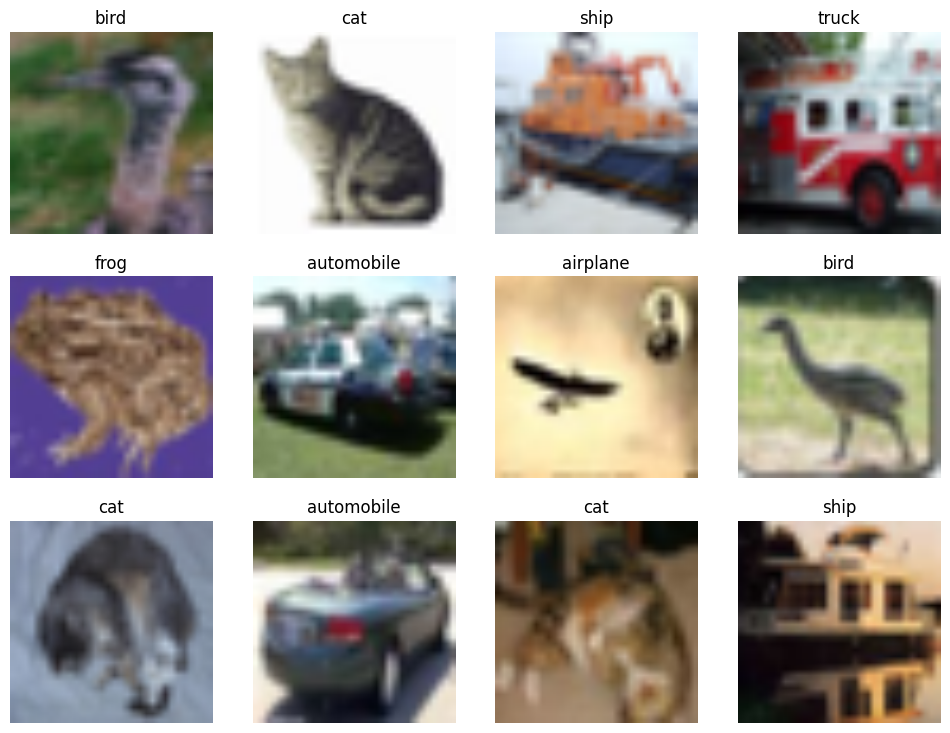

In [6]:
dataloader.valid.show_batch(max_n=12, nrows=3)

In [7]:
learner34 = vision_learner(dataloader, resnet34, metrics=accuracy)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 215MB/s]


SuggestedLRs(valley=0.0006918309954926372)

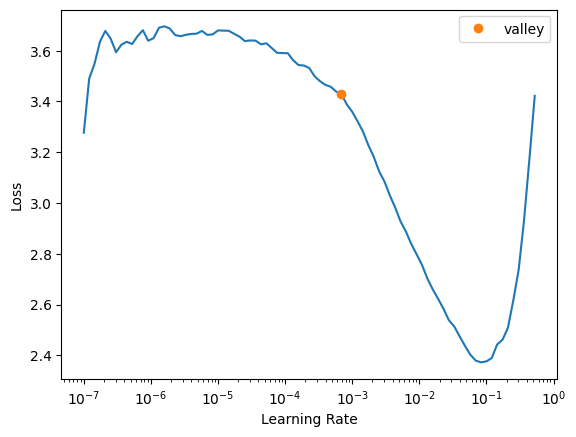

In [8]:
learner34.lr_find()

In [9]:
learner34.fit_one_cycle(3, lr_max=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.369088,0.264654,0.910917,03:27
1,0.230427,0.168955,0.940500,03:26
2,0.143761,0.138712,0.950750,03:27


SuggestedLRs(valley=0.00363078061491251)

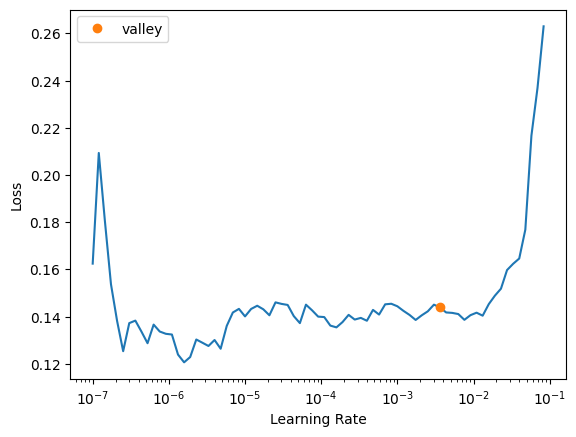

In [10]:
learner34.lr_find()

In [11]:
learner34.fit_one_cycle(2, lr_max=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.131477,0.136522,0.950667,03:28
1,0.111871,0.135424,0.952500,03:27


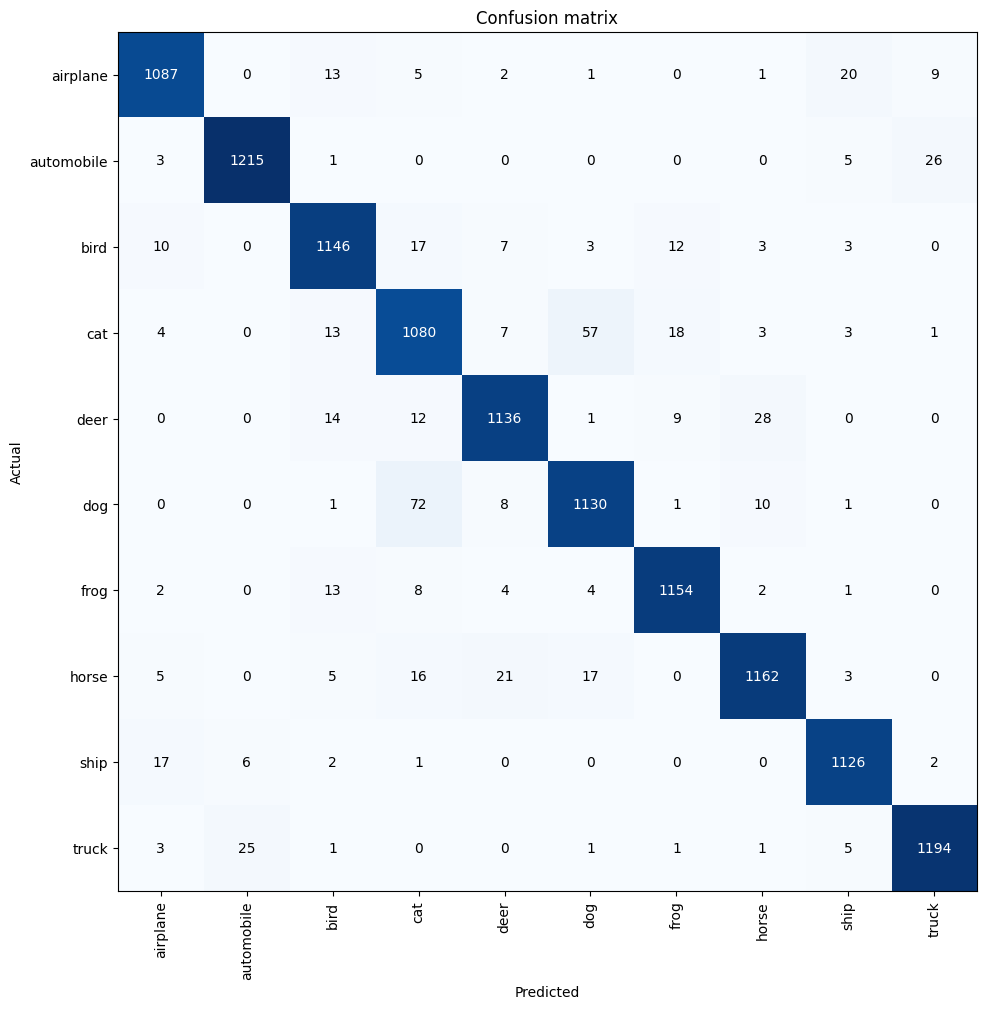

In [12]:
interp34 = ClassificationInterpretation.from_learner(learner34)
interp34.plot_confusion_matrix(figsize=(13,10))

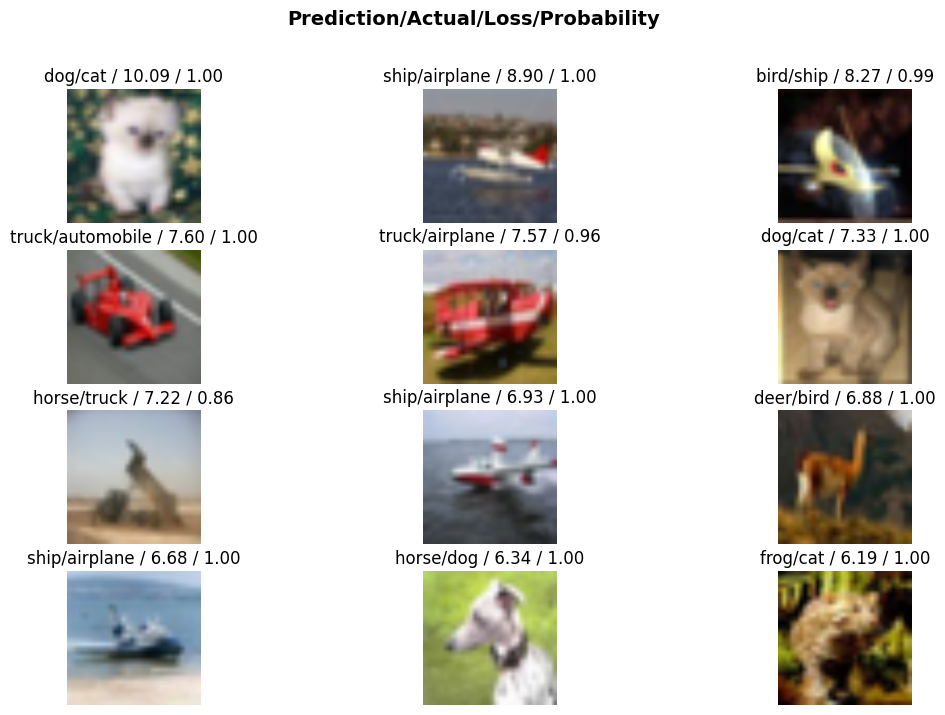

In [13]:
interp34.plot_top_losses(12, nrows=4, figsize=(13, 8))